# protospacer flanking sequences data exploration

In [45]:
# 05/07
# Made by L-F-S
# At the University Of Trento, Italy

import os

import sys
import pandas as pd
import matplotlib.pyplot as plt
from Bio import SeqIO
from Bio.Seq import Seq
# for clustal alignments
#from Bio import AlignIO
#from Bio.Align.Applications import ClustalwCommandline
#from Bio.Align import AlignInfo
# to make logos
import logomaker as lm
feature="Cas9" #WARNING!!! CHANGE THIS!!
datadir="/shares/CIBIO-Storage/CM/news/users/lorenzo.signorini/8pamsearch/out/"
seqid ="AJHGDLDC_00764"   # MANUAL INPUT
outdir=datadir+seqid+"/"


### Load file

In [46]:
PAM_dataset_name="dataset_flanking_sequences_of_putative_protospacers"
PAMdata=pd.read_csv(outdir+PAM_dataset_name, header=None)
PAMdata.head()

,0,1,2,3,4,5
0,NODE_1930_length_7783_cov_5.60675,TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACGCTGG...,AsnicarF_2017__MV_FEM4_t2Q15.contigs_filtered....,AsnicarF_2017__MV_FEM4_t2Q15__bin.24,TACATCGACATGAACAGCATACCGACGCTG
1,NODE_3807_length_5163_cov_11.0000_ID_96823,TGACCTTGGCACGGCCGACATTCATGATGCCGCCGCCCGCACCGCC...,CCCAGCATGACCGAGTAGAAGATGATCTCCAGCCAGGGCACGCTGG...,AsnicarF_2017__MV_FEM4_t2Q15_megahit.contigs_f...,0,TACATCGACATGAACAGCATACCGACGCTG
2,NODE_2216_length_7565_cov_2.67683,CCTGGGCCACAGCACTGAAAGATGTCCCCTTGCAAGCGGCCAAGAG...,CCGCCCACCGTTGCCGAACTGCGCACGGCGGCAGAGAAATTTCTCC...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,GCGGCAAATCTGGCCGCCACACTGAAATTC
3,NODE_11024_length_2243_cov_3.21801,TGACCTTGGCGCGGCCCACATTCATGATGCCGCCGCCTGCGCCGCC...,GCAATCATAGCGACATAGAAGATGATTTCCAGCCAGGGAATGCTTG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAGCATGCCGATGCTG
4,NODE_2410_length_7098_cov_3.4119,TGACCTTGGCGCGGCCTACATTCATGATGCCGCCGCCCGCGCCGCC...,CCGATCATTGCGACGTAGAAGATGATCTCCAGCCAGGGAATGCTCG...,AsnicarF_2017__MV_FEM5_t1Q14.contigs_filtered....,0,TACATCGACATGAACAACATACCGATGCTG


col0: contig, col1: upstream flanking sequence, col1: downtream flanking sequence, col3: samplename col4: bin (0 if unbinned)  col5: protospacer

In [47]:
PAMdata.shape

(7415, 6)

## Check length of flanking regions#
### Upstream

In [3]:
PAMdata[1].str.count("").value_counts()

51    7415
Name: 1, dtype: int64

In [4]:
print(PAMdata[1].shape,PAMdata[1].dropna().shape)

(7415,) (7415,)


Ma ci sn alcune righe senza dati, o con dati mancanti, o con dati mancanti, es:
 BackhedF_2015__SID130_M.contigs_filtered.fasta,    questo nel contig  NODE_16046_length_1718_cov_1.75827 non funge la seq upstream. esempio
 mentre BackhedF_2015__SID26_12M_megahit.contigs_filtered.fasta ha la seq DOWNStream corta (come accate ad altre), nel contig NODE_6634_length_2333_cov_7.0000_ID_14245
 altra downstream corta, x fare un dataset diverso: LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered     NODE_1465_length_4048_cov_9.0000_ID_34458

In [5]:
PAMdata[PAMdata[3]=="BackhedF_2015__SID130_M.contigs_filtered.fasta"]  # il primo era NaN

,0,1,2,3,4,5
18,NODE_16046_length_1718_cov_1.75827,XXXXXXXXXXXXXCGTGTGTATGCCCGTCGCGTTGCCGGTCTCGCC...,TCGCCCACGTTCCAAATTTGCGAGGCAAAGTGCGCGGCCCGCCATG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GTGCCGATAAACTGCCCCTTGGAAATGGTG
19,NODE_12772_length_2188_cov_2.30286,CAATTTTTGTCCAGAACTCGGTACGATCCAGAGAAACACCTGACGG...,CTGTCCACGACAACGGTGTTTGCCTCGTACTGGCTGGTGATGTCCC...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GGCTGCACGGAAAGATATGCGTTGCCGTTG
20,NODE_10241_length_2770_cov_2.19853,GCTTGACGCGCTGCTTCTTGCCGATCATCTTCTCGACGGTATCTGT...,ATTCCCACAGCGTTCGACATACACAGCAACGTTAGAGGCTTTCGCC...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,TCCCACTGCATATAATAGGGGTTTGCC
21,NODE_18192_length_1500_cov_2.0955,ACGGTCAGTGTTGAACACCGTCACACCGCCCGAGCCAAAGACCAGA...,GCGTCCATCGTACCATAGACACGGCCTCAAGAAATAGATACTTGCG...,BackhedF_2015__SID130_M.contigs_filtered.fasta,0,GCAAGCGGTTACTGGGCCACGTGTCGGGGA


### Downstream

In [10]:
PAMdata[2].str.count("").value_counts() #must be one row

51    7415
Name: 2, dtype: int64

In [9]:
print(PAMdata[2].shape,PAMdata[2].dropna().shape)

(7415,) (7415,)


In [11]:
# per il downstream:
PAMdata[PAMdata[3]=="LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered.fasta"]

,0,1,2,3,4,5
2439,NODE_1634_length_3807_cov_6.7785_ID_29044,GTTGGTCTGGCCGTAGTAGTTGGTTTGCAGGACCTGCGGTTTGTGG...,GCGCCCACGCCTTGTCCGTCACGGGGTCCGAATCGCAAAAATTGAT...,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,CGTACATGTCCACGCTCTGGCCCTCTTCCA
2440,NODE_1465_length_4048_cov_9.0000_ID_34458,CCGGTCGGTATCAAATACCGTCACACCGCCATCCCCAAATACCAGG...,CAGTGTCCACCGCACCATGGAAAXXXXXXXXXXXXXXXXXXXXXXX...,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,GCAAGCGGTTGCTGGGCCAGGTGTCGGG
2441,NODE_1429_length_4113_cov_6.8918_ID_44496,CCGGTCGGTATCAAATACCGTTACACCGCCATCCCCAAATACCAGG...,CAGTGTCCACCGCACCATGGAAATGGCCTCCAAAAACAGGTACTTG...,LawrenceA_2015__LD-Run2-11_megahit.contigs_fil...,0,GCAAGCGGTTGCTGGGCCAGGTGTCGGG


In [12]:
es=PAMdata[PAMdata[3]=="LawrenceA_2015__LD-Run2-11_megahit.contigs_filtered.fasta"].iloc[1].iloc[2]
es

'CAGTGTCCACCGCACCATGGAAAXXXXXXXXXXXXXXXXXXXXXXXXXXX'

lots of shorter sequences, for protospacers close to the end of the contig.

In [14]:
astring=list(range(100))
start=0
end=9
a_downstream_substring_outisde=astring[90:150]
print(a_downstream_substring_outisde,": this prints out but is shorter")
an_upstream_substring_outisde=astring[-10:20]
print(an_upstream_substring_outisde, "this does not save")



[90, 91, 92, 93, 94, 95, 96, 97, 98, 99] : this prints out but is shorter
[] this does not save


# ATTENZIONE  BritoIL_2016__W1.6.ST_megahit  contig  NODE_12196_length_2776_cov_6.0000_ID_96776  ha DUE PROTOSPACER SULLO STESSO CONTIG. bisognerà aggiungere righe. update: pare si sia messo ora:

In [16]:
PAMdata[PAMdata[0]=="NODE_12196_length_2776_cov_6.0000_ID_96776"]

,0,1,2,3,4,5
353,NODE_12196_length_2776_cov_6.0000_ID_96776,XXXXXXXXXXXXXXXXXXXXXXACGGTCCAGAGAAACACCGGACGG...,CTGTCCACCACAACGGTATTAGCTTCGTACTGGCTGGTGATGTCCC...,BritoIL_2016__W1.6.ST_megahit.contigs_filtered...,0,GGCTGCACGGAAAGATAGGCGTTGCCGTTG
354,NODE_12196_length_2776_cov_6.0000_ID_96776,GCGGTCAGTATTGAACACCGTAACACCGCCGGAGCCGAACACAAGA...,GCGTCCACCGGACCATAGACACGGCCTCAAGGAACAGATACTTGCG...,BritoIL_2016__W1.6.ST_megahit.contigs_filtered...,0,GCAAACGGTTACTGGGCCATGTGTCGGGGA


## Check for shorter sequences (i.e. with'x' inside)

In [18]:
# Upstream
PAMdata[1].str.count("X").value_counts().sort_index()

0     7268
2        3
3        1
7        2
9        4
11       1
13       4
14       2
15       1
16       1
17       4
18       1
19       6
20       8
21       2
22       3
23       4
24       4
25       6
26       3
27       1
28       1
29       4
31       2
32       4
33       4
34       2
35       5
36       3
37       3
38       6
39       4
40       1
41       6
42       2
44       3
45       3
46       4
47       5
48       5
49       3
50      16
Name: 1, dtype: int64

In [19]:
# Downstream:
PAMdata[2].str.count("X").value_counts().sort_index()

0     7341
2        1
3        1
4        3
5        1
6        2
7        3
8        1
9        2
10       1
11       2
12       4
13       2
14       2
16       4
18       2
19       1
20       3
21       1
23       2
25       1
27       1
28       2
30       2
32       1
33       4
36       1
37       2
38       1
39       1
40       1
42       1
44       1
46       1
47       2
50      14
Name: 2, dtype: int64

# Sequence logos

In [17]:
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata[1])
counts_mat.to_csv(outdir+"upstream.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,738.0,1008.0,714.0,4808.0,147.0
1,572.0,1320.0,4631.0,745.0,147.0
2,5095.0,79.0,833.0,1264.0,144.0
3,525.0,4586.0,1784.0,377.0,143.0
4,231.0,5304.0,921.0,816.0,143.0


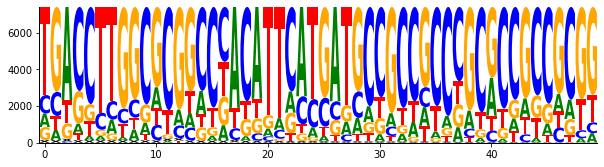

In [20]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.logo.pdf")

In [21]:
#downstream:
# 1: remove strings with different length:
counts_mat = lm.alignment_to_matrix(PAMdata[2])
counts_mat.to_csv(outdir+"down.pileup")
counts_mat.head()

,A,C,G,T,X
pos,,,,,
0,798.0,5029.0,1235.0,339.0,14.0
1,494.0,5771.0,76.0,1060.0,14.0
2,761.0,936.0,5453.0,251.0,14.0
3,4830.0,1404.0,136.0,1029.0,16.0
4,195.0,1923.0,1640.0,3640.0,17.0


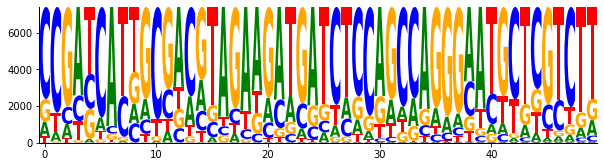

In [22]:
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.logo.pdf")

###  try filtering out binned ones..

In [23]:
PAMdata_unbinned=PAMdata[PAMdata[4]=="0"]
print(PAMdata_unbinned.shape)

(5898, 6)


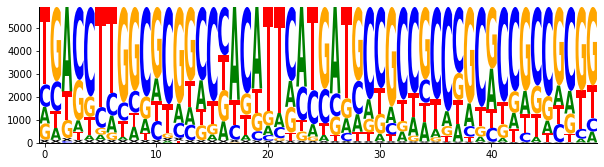

In [26]:
#redo the same stuff
#Upstream:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[1])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"upstream.unbinned.logo.pdf")

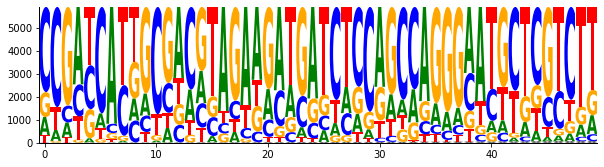

In [27]:
#downstream:
# 1: remove strings with different length:
counts_mat = lm.alignment_to_matrix(PAMdata_unbinned[2])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)
plt.savefig(seqid+"downstream.unbinned.logo.pdf")

## Are all genomes coming from HMP_2012?

In [41]:
#no hmp
nohmp=PAMdata[~PAMdata[3].str.startswith("HMP_2012")] #~ negates expression

In [48]:
nohmp.shape

(7210, 6)

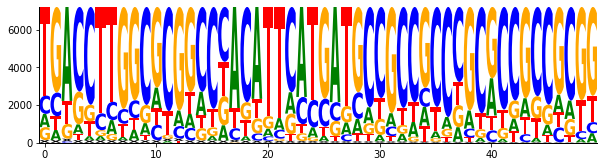

In [49]:
#upstream:

counts_mat = lm.alignment_to_matrix(nohmp[1])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

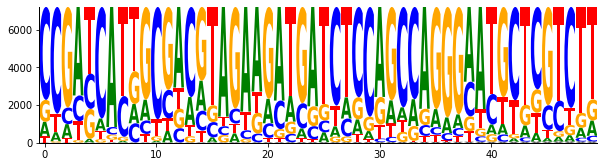

In [50]:
#downstream:
counts_mat = lm.alignment_to_matrix(nohmp[2])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

## Check dataset abundance

In [57]:
PAMdata[3].str[0:8].value_counts()

ZeeviD_2    538
XieH_201    478
CosteaPI    448
QinJ_201    428
LiJ_2014    391
LeChatel    372
FengQ_20    365
Schirmer    333
NielsenH    300
CM_madag    285
LiJ_2017    274
YuJ_2015    273
WenC_201    262
LiuW_201    253
ZellerG_    253
QinN_201    231
Karlsson    222
HMP_2012    205
HeQ_2017    176
BackhedF    161
Chengpin    151
Bengtsso    126
LiSS_201    119
VatanenT    116
BritoIL_    100
Vogtmann     94
LouisS_2     67
IjazUZ_2     67
RaymondF     59
LoombaR_     57
KosticAD     42
Obregon-     35
GeversD_     28
CM_carit     28
Hannigan     23
VincentC     16
Rampelli     14
AsnicarF     10
LomanNJ_      7
Lawrence      4
SmitsSA_      3
CM_perii      1
Name: 3, dtype: int64

In [59]:
# Xieh has 500 samples. Almost all of them had a match apparently. let's check

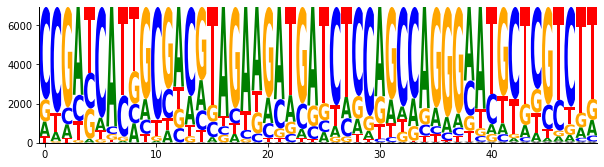

In [61]:
counts_mat = lm.alignment_to_matrix(PAMdata[~PAMdata[3].str.startswith("XieH")][2])
logo=lm.Logo(counts_mat,shade_below=.5,fade_below=.5, color_scheme="classic")
logo.style_spines(visible=False)
logo.style_spines(spines=['left', 'bottom'], visible=True)

In [62]:
# nothing changes. still pretty solid.